## Descartes Underwriting

### Data Reading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
train = pd.read_csv("train_auto.csv", header=0, index_col=0)
test = pd.read_csv("test_auto.csv", header=0, index_col=0)

In [4]:
train.head()

,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,SEX,EDUCATION,JOB,TRAVTIME,CAR_USE,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
INDEX,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0.0,0,60.0,0,11.0,"$67,349",No,$0,z_No,M,PhD,Professional,14,Private,"$14,230",11,Minivan,yes,"$4,461",2,No,3,18.0,Highly Urban/ Urban
2,0,0.0,0,43.0,0,11.0,"$91,449",No,"$257,252",z_No,M,z_High School,z_Blue Collar,22,Commercial,"$14,940",1,Minivan,yes,$0,0,No,0,1.0,Highly Urban/ Urban
4,0,0.0,0,35.0,1,10.0,"$16,039",No,"$124,191",Yes,z_F,z_High School,Clerical,5,Private,"$4,010",4,z_SUV,no,"$38,690",2,No,3,10.0,Highly Urban/ Urban
5,0,0.0,0,51.0,0,14.0,NaN,No,"$306,251",Yes,M,<High School,z_Blue Collar,32,Private,"$15,440",7,Minivan,yes,$0,0,No,0,6.0,Highly Urban/ Urban
6,0,0.0,0,50.0,0,NaN,"$114,986",No,"$243,925",Yes,z_F,PhD,Doctor,36,Private,"$18,000",1,z_SUV,no,"$19,217",2,Yes,3,17.0,Highly Urban/ Urban


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8161 entries, 1 to 10302
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   TARGET_FLAG  8161 non-null   int64  
 1   TARGET_AMT   8161 non-null   float64
 2   KIDSDRIV     8161 non-null   int64  
 3   AGE          8155 non-null   float64
 4   HOMEKIDS     8161 non-null   int64  
 5   YOJ          7707 non-null   float64
 6   INCOME       7716 non-null   object 
 7   PARENT1      8161 non-null   object 
 8   HOME_VAL     7697 non-null   object 
 9   MSTATUS      8161 non-null   object 
 10  SEX          8161 non-null   object 
 11  EDUCATION    8161 non-null   object 
 12  JOB          7635 non-null   object 
 13  TRAVTIME     8161 non-null   int64  
 14  CAR_USE      8161 non-null   object 
 15  BLUEBOOK     8161 non-null   object 
 16  TIF          8161 non-null   int64  
 17  CAR_TYPE     8161 non-null   object 
 18  RED_CAR      8161 non-null   object 
 19  OLDCL

In [6]:
train["TARGET_FLAG"].value_counts()

0    6008
1    2153
Name: TARGET_FLAG, dtype: int64

In [7]:
test.head()

,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,SEX,EDUCATION,JOB,TRAVTIME,CAR_USE,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
INDEX,,,,,,,,,,,,,,,,,,,,,,,,,
3,NaN,NaN,0,48.0,0,11.0,"$52,881",No,$0,z_No,M,Bachelors,Manager,26,Private,"$21,970",1,Van,yes,$0,0,No,2,10.0,Highly Urban/ Urban
9,NaN,NaN,1,40.0,1,11.0,"$50,815",Yes,$0,z_No,M,z_High School,Manager,21,Private,"$18,930",6,Minivan,no,"$3,295",1,No,2,1.0,Highly Urban/ Urban
10,NaN,NaN,0,44.0,2,12.0,"$43,486",Yes,$0,z_No,z_F,z_High School,z_Blue Collar,30,Commercial,"$5,900",10,z_SUV,no,$0,0,No,0,10.0,z_Highly Rural/ Rural
18,NaN,NaN,0,35.0,2,NaN,"$21,204",Yes,$0,z_No,M,z_High School,Clerical,74,Private,"$9,230",6,Pickup,no,$0,0,Yes,0,4.0,z_Highly Rural/ Rural
21,NaN,NaN,0,59.0,0,12.0,"$87,460",No,$0,z_No,M,z_High School,Manager,45,Private,"$15,420",1,Minivan,yes,"$44,857",2,No,4,1.0,Highly Urban/ Urban


In [8]:
submission = pd.read_csv("MEAN_AUTO.csv", index_col=0, header=0)

In [9]:
submission.head()

,p_target
INDEX,
3,1495.78
9,1495.78
10,1495.78
18,1495.78
21,1495.78


The goal of this project is to predict the content of the column $TARGET\_FLAG$ given some attributes. It is a categorical variable so we are facing a classification problem (more precisely binary classificatoin). The distribution between the 2 classes is not balanced, it is something that we will have in mind when choosing the evaluation metric. For example, the AUC and the f1-score will be preferred to accuracy. In order to solve the problem we are going to perform data exploration, data cleaning and processing and finally model selection. At the end of this process we will have a baseline solution with many improvements possible.

### Data Exploration

In [10]:
num_cols = [column for column in train.columns if train[column].dtype=="float64" or train[column].dtype=="int64"]
cat_cols = [column for column in train.columns if column not in num_cols]
print("categorical variables : "+str(cat_cols))

categorical variables : ['INCOME', 'PARENT1', 'HOME_VAL', 'MSTATUS', 'SEX', 'EDUCATION', 'JOB', 'CAR_USE', 'BLUEBOOK', 'CAR_TYPE', 'RED_CAR', 'OLDCLAIM', 'REVOKED', 'URBANICITY']


We notice that the categorical attributes include some columns that should not be categorical such as 'INCOME','HOME_VAL', 'BLUEBOOK' , 'OLDCLAIM'. We are going to cast them to the good type.

In [11]:
to_modify = ['INCOME', 'HOME_VAL', 'BLUEBOOK', 'OLDCLAIM']
print("----------TRAIN----------")
for column in to_modify :
    print(column+": "+str(train[column].isna().sum())+" Nan values.")
print("-----------TEST-----------")
for column in to_modify :
    print(column+": "+str(test[column].isna().sum())+" Nan values.")

----------TRAIN----------
INCOME: 445 Nan values.
HOME_VAL: 464 Nan values.
BLUEBOOK: 0 Nan values.
OLDCLAIM: 0 Nan values.
-----------TEST-----------
INCOME: 125 Nan values.
HOME_VAL: 111 Nan values.
BLUEBOOK: 0 Nan values.
OLDCLAIM: 0 Nan values.


In [12]:
def str_to_int(x):
    #print(x)
    if x is np.nan:
        pass
    else :
        if isinstance(x, str):
            return float(x.replace(",", ".")[1:])
        else :
            return float(x)

In [13]:
for column in to_modify :
    train[column] = train[column].apply(lambda x : str_to_int(x))
    test[column] = test[column].apply(lambda x : str_to_int(x))

Now we redo the division of columns.

In [14]:
num_cols = [column for column in train.columns if train[column].dtype=="float64" or train[column].dtype=="int64"]
cat_cols = [column for column in train.columns if column not in num_cols]
print("categorical attributes : "+str(cat_cols))

categorical attributes : ['PARENT1', 'MSTATUS', 'SEX', 'EDUCATION', 'JOB', 'CAR_USE', 'CAR_TYPE', 'RED_CAR', 'REVOKED', 'URBANICITY']


### NaN values

In [15]:
(train.isna().sum()/train.shape[0])*100

TARGET_FLAG    0.000000
TARGET_AMT     0.000000
KIDSDRIV       0.000000
AGE            0.073520
HOMEKIDS       0.000000
YOJ            5.563044
INCOME         5.452763
PARENT1        0.000000
HOME_VAL       5.685578
MSTATUS        0.000000
SEX            0.000000
EDUCATION      0.000000
JOB            6.445289
TRAVTIME       0.000000
CAR_USE        0.000000
BLUEBOOK       0.000000
TIF            0.000000
CAR_TYPE       0.000000
RED_CAR        0.000000
OLDCLAIM       0.000000
CLM_FREQ       0.000000
REVOKED        0.000000
MVR_PTS        0.000000
CAR_AGE        6.249234
URBANICITY     0.000000
dtype: float64

In [16]:
(test.isna().sum()/test.shape[0])*100

TARGET_FLAG    100.000000
TARGET_AMT     100.000000
KIDSDRIV         0.000000
AGE              0.046707
HOMEKIDS         0.000000
YOJ              4.390472
INCOME           5.838393
PARENT1          0.000000
HOME_VAL         5.184493
MSTATUS          0.000000
SEX              0.000000
EDUCATION        0.000000
JOB              6.492293
TRAVTIME         0.000000
CAR_USE          0.000000
BLUEBOOK         0.000000
TIF              0.000000
CAR_TYPE         0.000000
RED_CAR          0.000000
OLDCLAIM         0.000000
CLM_FREQ         0.000000
REVOKED          0.000000
MVR_PTS          0.000000
CAR_AGE          6.025222
URBANICITY       0.000000
dtype: float64

In the training set, the amount of Nan values for each column is less than $10\%$. If we base our reasoning on that, there is no column to suppress, we will rather perform an encoding. However, $TARGET\_AMT$ are $100\%$ Nan values in the test set, hence we are going to suppress these columns. $TARGET\_FLAG$ is the target to predict, hence it is a nan column in the test set.

In [17]:
train

,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,SEX,EDUCATION,JOB,TRAVTIME,CAR_USE,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
INDEX,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0.0,0,60.0,0,11.0,67.349,No,0.000,z_No,M,PhD,Professional,14,Private,14.23,11,Minivan,yes,4.461,2,No,3,18.0,Highly Urban/ Urban
2,0,0.0,0,43.0,0,11.0,91.449,No,257.252,z_No,M,z_High School,z_Blue Collar,22,Commercial,14.94,1,Minivan,yes,0.000,0,No,0,1.0,Highly Urban/ Urban
4,0,0.0,0,35.0,1,10.0,16.039,No,124.191,Yes,z_F,z_High School,Clerical,5,Private,4.01,4,z_SUV,no,38.690,2,No,3,10.0,Highly Urban/ Urban
5,0,0.0,0,51.0,0,14.0,NaN,No,306.251,Yes,M,<High School,z_Blue Collar,32,Private,15.44,7,Minivan,yes,0.000,0,No,0,6.0,Highly Urban/ Urban
6,0,0.0,0,50.0,0,NaN,114.986,No,243.925,Yes,z_F,PhD,Doctor,36,Private,18.00,1,z_SUV,no,19.217,2,Yes,3,17.0,Highly Urban/ Urban
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10297,0,0.0,0,35.0,0,11.0,43.112,No,0.000,z_No,M,z_High School,z_Blue Collar,51,Commercial,27.33,10,Panel Truck,yes,0.000,0,No,0,8.0,z_Highly Rural/ Rural
10298,0,0.0,1,45.0,2,9.0,164.669,No,386.273,Yes,M,PhD,Manager,21,Private,13.27,15,Minivan,no,0.000,0,No,2,17.0,Highly Urban/ Urban
10299,0,0.0,0,46.0,0,9.0,107.204,No,332.591,Yes,M,Masters,NaN,36,Commercial,24.49,6,Panel Truck,no,0.000,0,No,0,1.0,Highly Urban/ Urban


In [18]:
train = train.drop(columns = ["TARGET_AMT"], errors='ignore')
test = test.drop(columns = ["TARGET_FLAG", "TARGET_AMT"], errors='ignore')

Let us update the columns

In [19]:
cat_cols = [col for col in cat_cols if col not in ["TARGET_AMT"]]
num_cols = [col for col in num_cols if col not in ["TARGET_AMT", "TARGET_FLAG"]]

### Categorical features

In [20]:
for column in cat_cols :
    print("---------------"+column+"----------------")
    print(train[column].value_counts())

---------------PARENT1----------------
No     7084
Yes    1077
Name: PARENT1, dtype: int64
---------------MSTATUS----------------
Yes     4894
z_No    3267
Name: MSTATUS, dtype: int64
---------------SEX----------------
z_F    4375
M      3786
Name: SEX, dtype: int64
---------------EDUCATION----------------
z_High School    2330
Bachelors        2242
Masters          1658
<High School     1203
PhD               728
Name: EDUCATION, dtype: int64
---------------JOB----------------
z_Blue Collar    1825
Clerical         1271
Professional     1117
Manager           988
Lawyer            835
Student           712
Home Maker        641
Doctor            246
Name: JOB, dtype: int64
---------------CAR_USE----------------
Private       5132
Commercial    3029
Name: CAR_USE, dtype: int64
---------------CAR_TYPE----------------
z_SUV          2294
Minivan        2145
Pickup         1389
Sports Car      907
Van             750
Panel Truck     676
Name: CAR_TYPE, dtype: int64
---------------RED_CAR-

Now we are going to replace the NaN values by the most frequent value for each attribute.

In [21]:
from sklearn.impute import SimpleImputer
cat_imputer = SimpleImputer(strategy="most_frequent")
cat_imputer.fit(train[cat_cols])

SimpleImputer(strategy='most_frequent')

In [22]:
train[cat_cols]

,PARENT1,MSTATUS,SEX,EDUCATION,JOB,CAR_USE,CAR_TYPE,RED_CAR,REVOKED,URBANICITY
INDEX,,,,,,,,,,
1,No,z_No,M,PhD,Professional,Private,Minivan,yes,No,Highly Urban/ Urban
2,No,z_No,M,z_High School,z_Blue Collar,Commercial,Minivan,yes,No,Highly Urban/ Urban
4,No,Yes,z_F,z_High School,Clerical,Private,z_SUV,no,No,Highly Urban/ Urban
5,No,Yes,M,<High School,z_Blue Collar,Private,Minivan,yes,No,Highly Urban/ Urban
6,No,Yes,z_F,PhD,Doctor,Private,z_SUV,no,Yes,Highly Urban/ Urban
...,...,...,...,...,...,...,...,...,...,...
10297,No,z_No,M,z_High School,z_Blue Collar,Commercial,Panel Truck,yes,No,z_Highly Rural/ Rural
10298,No,Yes,M,PhD,Manager,Private,Minivan,no,No,Highly Urban/ Urban
10299,No,Yes,M,Masters,NaN,Commercial,Panel Truck,no,No,Highly Urban/ Urban


In [23]:
train[cat_cols] = cat_imputer.transform(train[cat_cols])

In [24]:
test[cat_cols] = cat_imputer.transform(test[cat_cols])

For each column, the number of category is less than 10, we have the choice between multiple encoding schemes such as :
- Frequency (Count) encoding
- One Hot Encoding

In [25]:
from sklearn.preprocessing import OneHotEncoder

In [26]:
def count_encoding(train, test, cat_cols):
    for column in cat_cols :
        frequencies = train[column].value_counts()
        train[column] = train[column].apply(lambda x : frequencies[x])
        test[column] = test[column].apply(lambda x : frequencies[x])
    return train, test

In [27]:
def one_hot_encoding(train, test, cat_cols):
    for column in cat_cols :
        n_categories = train[column].nunique()
        #print("number of categories = "+str(n_categories))
        oh_encoder = OneHotEncoder()
        data_train = train[column].values.reshape(-1, 1)
        data_test = test[column].values.reshape(-1, 1)
        oh_encoder.fit(data_train)
        df_train = pd.DataFrame(data = oh_encoder.transform(data_train).todense(), index=train.index, columns = [column+"_"+str(i) for i in range(n_categories)])
        df_test = pd.DataFrame(data = oh_encoder.transform(data_test).todense(), index=test.index, columns = [column+"_"+str(i) for i in range(n_categories)])
        train = pd.concat([train, df_train], axis = 1)
        test = pd.concat([test, df_test], axis = 1)
    train = train.drop(columns = cat_cols)
    test = test.drop(columns = cat_cols)
    return train, test

In [28]:
train, test = one_hot_encoding(train, test, cat_cols)
#train, test = count_encoding(train, test, cat_cols)

In [29]:
train

,TARGET_FLAG,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,HOME_VAL,TRAVTIME,BLUEBOOK,TIF,OLDCLAIM,CLM_FREQ,MVR_PTS,CAR_AGE,PARENT1_0,PARENT1_1,MSTATUS_0,MSTATUS_1,SEX_0,SEX_1,EDUCATION_0,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,JOB_0,JOB_1,JOB_2,JOB_3,JOB_4,JOB_5,JOB_6,JOB_7,CAR_USE_0,CAR_USE_1,CAR_TYPE_0,CAR_TYPE_1,CAR_TYPE_2,CAR_TYPE_3,CAR_TYPE_4,CAR_TYPE_5,RED_CAR_0,RED_CAR_1,REVOKED_0,REVOKED_1,URBANICITY_0,URBANICITY_1
INDEX,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,60.0,0,11.0,67.349,0.000,14,14.23,11,4.461,2,3,18.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2,0,0,43.0,0,11.0,91.449,257.252,22,14.94,1,0.000,0,0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4,0,0,35.0,1,10.0,16.039,124.191,5,4.01,4,38.690,2,3,10.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
5,0,0,51.0,0,14.0,NaN,306.251,32,15.44,7,0.000,0,0,6.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
6,0,0,50.0,0,NaN,114.986,243.925,36,18.00,1,19.217,2,3,17.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10297,0,0,35.0,0,11.0,43.112,0.000,51,27.33,10,0.000,0,0,8.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
10298,0,1,45.0,2,9.0,164.669,386.273,21,13.27,15,0.000,0,2,17.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
10299,0,0,46.0,0,9.0,107.204,332.591,36,24.49,6,0.000,0,0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


### Numerical features

In [30]:
num_imputer = SimpleImputer(strategy="mean")
num_imputer.fit(train[num_cols])

SimpleImputer()

We replace the Nan values by the mean for numerical features.

In [31]:
train[num_cols] = num_imputer.transform(train[num_cols])

In [32]:
test[num_cols] = num_imputer.transform(test[num_cols])

In [33]:
X_train, y_train = train.drop(columns = ["TARGET_FLAG"]), train["TARGET_FLAG"]
X_test = test.copy()

### Model selection

Here we are going to split the training set into 2 parts, the first part is going to be used to train our models and the second part will be used to validate our results

In [34]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
X_training, X_val, y_training, y_val = train_test_split(X_train, y_train, test_size=0.2)

#### XGBoost

In [35]:
from xgboost import XGBClassifier

model_xg = XGBClassifier(n_estimators=1000)
eval_set = [(X_training, y_training), (X_val, y_val)]
model_xg.fit(X_training, y_training, early_stopping_rounds=10, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)

[0]	validation_0-error:0.22243	validation_0-logloss:0.59022	validation_1-error:0.25965	validation_1-logloss:0.60223
[1]	validation_0-error:0.20129	validation_0-logloss:0.52901	validation_1-error:0.22841	validation_1-logloss:0.54800
[2]	validation_0-error:0.19179	validation_0-logloss:0.48716	validation_1-error:0.23331	validation_1-logloss:0.51693
[3]	validation_0-error:0.18336	validation_0-logloss:0.45700	validation_1-error:0.22474	validation_1-logloss:0.49338
[4]	validation_0-error:0.17908	validation_0-logloss:0.43573	validation_1-error:0.21800	validation_1-logloss:0.48052
[5]	validation_0-error:0.17708	validation_0-logloss:0.41995	validation_1-error:0.21617	validation_1-logloss:0.47449
[6]	validation_0-error:0.16697	validation_0-logloss:0.40560	validation_1-error:0.21617	validation_1-logloss:0.46847
[7]	validation_0-error:0.16682	validation_0-logloss:0.39484	validation_1-error:0.21617	validation_1-logloss:0.46348
[8]	validation_0-error:0.15717	validation_0-logloss:0.38298	validation_1

/Users/randy/miniforge3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=1000, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [36]:
results = model_xg.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)

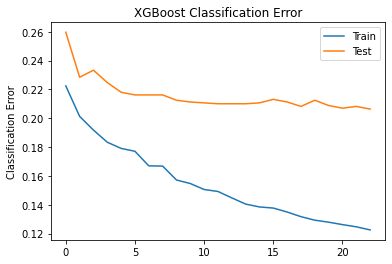

In [37]:
# plot classification error
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
plt.ylabel('Classification Error')
plt.title('XGBoost Classification Error')
plt.show()

In [38]:
print(classification_report(y_val, model_xg.predict(X_val)))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1221
           1       0.63      0.40      0.49       412

    accuracy                           0.79      1633
   macro avg       0.73      0.66      0.68      1633
weighted avg       0.77      0.79      0.77      1633



#### Catboost

In [39]:
!pip install catboost

In [40]:
from catboost import CatBoostClassifier

In [41]:
model_cat = CatBoostClassifier(
    iterations = 1000,
    #learning_rate = 0.05, 
    depth = 8,
    eval_metric='AUC',
    verbose = 2,
    #task_type = 'GPU',
)

In [42]:
model_cat.fit(
    X_training, y_training,
    eval_set = (X_val, y_val),
    early_stopping_rounds = 10,
    verbose = False,
    plot = True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

With this classifier we can see the feature that impact the most the prediction, in this case it is the feature URBANICITY that have the strongest impact.

<AxesSubplot:xlabel='Importance', ylabel='Features'>

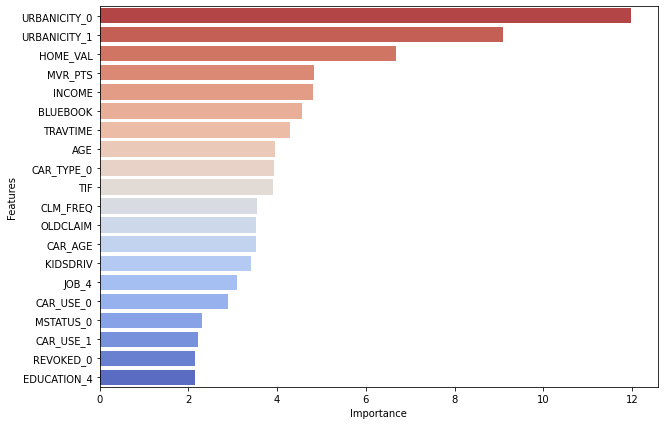

In [43]:
feature_dict = {'Features': list(X_test.columns), 'Importance': model_cat.feature_importances_}
feature_imp = pd.DataFrame(feature_dict).sort_values(by = ['Importance'], ascending = False)
plt.figure(figsize=(10, 7))
df_imp = feature_imp.head(20)
sns.barplot(y = df_imp["Features"], x = df_imp["Importance"], palette = 'coolwarm_r')

In [44]:
print(classification_report(y_val, model_cat.predict(X_val)))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87      1221
           1       0.65      0.35      0.45       412

    accuracy                           0.79      1633
   macro avg       0.73      0.64      0.66      1633
weighted avg       0.77      0.79      0.76      1633



#### Random Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(
    n_estimators=1000,
    n_jobs=-1
)

In [46]:
model_rf.fit(X_training, y_training)

RandomForestClassifier(n_estimators=1000, n_jobs=-1)

In [47]:
print(classification_report(y_val, model_rf.predict(X_val)))

              precision    recall  f1-score   support

           0       0.82      0.94      0.87      1221
           1       0.69      0.37      0.48       412

    accuracy                           0.80      1633
   macro avg       0.75      0.65      0.68      1633
weighted avg       0.78      0.80      0.77      1633



#### Combination

Here we perform a vote on the all the classifier we trained to get the best out of each and build a stronger predictor.

In [48]:
from sklearn.ensemble import VotingClassifier, GradientBoostingClassifier

In [49]:
voting = VotingClassifier(
    estimators=[
        ('xgboost', model_xg), 
        ('catboost', model_cat), 
        ('random forest', model_rf)
    ], 
    voting='hard'
    #voting='soft'
)
voting = voting.fit(X_training, y_training)
pred_val_vote = voting.predict(X_val)

[14:37:32] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/randy/miniforge3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Learning rate set to 0.022953
0:	total: 5.34ms	remaining: 5.34s
2:	total: 15.5ms	remaining: 5.14s
4:	total: 24.9ms	remaining: 4.96s
6:	total: 34ms	remaining: 4.82s
8:	total: 43.3ms	remaining: 4.77s
10:	total: 52.4ms	remaining: 4.71s
12:	total: 61.9ms	remaining: 4.7s
14:	total: 72ms	remaining: 4.73s
16:	total: 81.1ms	remaining: 4.69s
18:	total: 89.9ms	remaining: 4.64s
20:	total: 98.8ms	remaining: 4.61s
22:	total: 108ms	remaining: 4.59s
24:	total: 117ms	remaining: 4.57s
26:	total: 126ms	remaining: 4.54s
28:	total: 135ms	remaining: 4.52s
30:	total: 144ms	remaining: 4.5s
32:	total: 153ms	remaining: 4.48s
34:	total: 162ms	remaining: 4.48s
36:	total: 171ms	remaining: 4.45s
38:	total: 180ms	remaining: 4.44s
40:	total: 189ms	remaining: 4.41s
42:	total: 198ms	remaining: 4.4s
44:	total: 207ms	remaining: 4.39s
46:	total: 216ms	remaining: 4.38s
48:	total: 225ms	remaining: 4.37s
50:	total: 234ms	remaining: 4.36s
52:	total: 243ms	remaining: 4.34s
54:	total: 252ms	remaining: 4.33s
56:	total: 262ms	re

In [50]:
print(classification_report(y_val, pred_val_vote))

              precision    recall  f1-score   support

           0       0.83      0.93      0.87      1221
           1       0.66      0.42      0.52       412

    accuracy                           0.80      1633
   macro avg       0.74      0.68      0.70      1633
weighted avg       0.78      0.80      0.78      1633



### Submission

In [51]:
model_cat.fit(X_train, y_train)
model_cat.fit(X_train, y_train)
model_rf.fit(X_train, y_train)

Learning rate set to 0.025249
0:	total: 7.63ms	remaining: 7.62s
2:	total: 17.9ms	remaining: 5.96s
4:	total: 33.8ms	remaining: 6.73s
6:	total: 43.4ms	remaining: 6.15s
8:	total: 54ms	remaining: 5.95s
10:	total: 68ms	remaining: 6.12s
12:	total: 83.6ms	remaining: 6.34s
14:	total: 114ms	remaining: 7.5s
16:	total: 128ms	remaining: 7.39s
18:	total: 138ms	remaining: 7.11s
20:	total: 149ms	remaining: 6.95s
22:	total: 161ms	remaining: 6.84s
24:	total: 172ms	remaining: 6.71s
26:	total: 182ms	remaining: 6.57s
28:	total: 192ms	remaining: 6.43s
30:	total: 203ms	remaining: 6.34s
32:	total: 212ms	remaining: 6.22s
34:	total: 223ms	remaining: 6.16s
36:	total: 233ms	remaining: 6.07s
38:	total: 245ms	remaining: 6.05s
40:	total: 258ms	remaining: 6.05s
42:	total: 269ms	remaining: 6s
44:	total: 280ms	remaining: 5.94s
46:	total: 290ms	remaining: 5.88s
48:	total: 302ms	remaining: 5.87s
50:	total: 312ms	remaining: 5.81s
52:	total: 322ms	remaining: 5.75s
54:	total: 333ms	remaining: 5.72s
56:	total: 348ms	remaini

RandomForestClassifier(n_estimators=1000, n_jobs=-1)

In [52]:
voting = voting.fit(X_train, y_train)

/Users/randy/miniforge3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:37:59] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Learning rate set to 0.025249
0:	total: 5.62ms	remaining: 5.61s
2:	total: 16.5ms	remaining: 5.48s
4:	total: 28.6ms	remaining: 5.69s
6:	total: 38.5ms	remaining: 5.46s
8:	total: 49.1ms	remaining: 5.41s
10:	total: 59ms	remaining: 5.31s
12:	total: 71.6ms	remaining: 5.44s
14:	total: 80.9ms	remaining: 5.31s
16:	total: 89.9ms	remaining: 5.2s
18:	total: 99.8ms	remaining: 5.15s
20:	total: 110ms	remaining: 5.12s
22:	total: 119ms	remaining: 5.07s
24:	total: 129ms	remaining: 5.04s
26:	total: 139ms	remaining: 5.02s
28:	total: 149ms	remaining: 4.98s
30:	total: 158ms	remaining: 4.95s
32:	total: 167ms	remaining: 4.91s
34:	total: 177ms	remaining: 4.88s
36:	total: 186ms	remaining: 4.85s
38:	t

In [53]:
best_model = voting
#best_model = model_cat

In [54]:
submission["TARGET_FLAG"] = best_model.predict(X_test)

In [55]:
submission = submission.drop(columns = ["p_target"])

In [56]:
submission.to_csv("prediction.csv", index=True)